In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
vita = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/vitatrack/merged_results.tsv", sep='\t')
lipids = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/lipids/merged_results.tsv", sep='\t')
neuro = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/neuro/merged_results.tsv", sep='\t')
merged_df = pd.concat([vita, lipids, neuro], ignore_index=True)

In [3]:
merged_df.head()

rmse       mae        r2   pearson  spearman       task method_name  \
0  4.573726  3.406116 -1.637248  0.641744  0.739255  vitatrack       ridge   
1  6.697584  4.902591 -4.621877  0.484215  0.620087  vitatrack       ridge   
2  2.862280  2.125044 -0.045591  0.825251  0.888580  vitatrack       ridge   
3  8.774572  6.340537 -8.613341  0.383635  0.539464  vitatrack       ridge   
4  2.778392  2.066281  0.014381  0.835452  0.897022  vitatrack       ridge   

  featsel     method_params        hash  
0     hvg    {'alpha': 1.0}  4ab9d83892  
1     hvg    {'alpha': 0.1}  21a5b4d24f  
2     hvg  {'alpha': 100.0}  c2d97443b9  
3     hvg   {'alpha': 0.01}  fbcbf2ca40  
4     hvg  {'alpha': 200.0}  188cf28d18

In [4]:
# Group by model type and feature selection, and compute summary metrics
grouped = merged_df.groupby(['method_name', 'featsel']).agg({
    'rmse': ['mean', 'std'],
    'mae': ['mean', 'std'],
    'r2': ['mean', 'std'],
    'pearson': ['mean', 'std'],
    'spearman': ['mean', 'std']
}).reset_index()
grouped

method_name        featsel      rmse                 mae            \
                                    mean       std      mean       std   
0          cvae            hvg  1.620105  1.618018  1.037262  1.003278   
1          cvae        hvg_svd  1.537695  1.571554  0.995070  1.042396   
2          cvae  hvg_svd_graph  1.971669  2.374652  1.449614  1.921796   
3          cvae            svd  1.507118  1.595426  0.973241  1.058979   
4          cvae      svd_graph  1.929676  2.411084  1.426997  1.942514   
5   elastic_net            hvg  1.310733  1.357837  0.967271  1.024899   
6   elastic_net        hvg_svd  1.157236  1.131866  0.853328  0.866815   
7   elastic_net  hvg_svd_graph  1.161568  1.136889  0.860228  0.875985   
8   elastic_net            svd  1.124871  1.156099  0.833426  0.881621   
9   elastic_net      svd_graph  1.128907  1.161297  0.840167  0.890886   
10          gnn            hvg  1.477079  1.473581  1.000676  1.042453   
11          gnn        hvg_svd  1.610081  1.532283  1.064118  1.067978   
12          gnn  hvg_svd_graph  1.743211  1.601647  1.187168  1.193077   
13          gnn            svd  1.548528  1.581065  1.031874  1.092923   
14          gnn      svd_graph  1.696614  1.632230  1.152433  1.214660   
15        lasso            hvg  1.176832  1.181543  0.878381  0.919686   
16        lasso        hvg_svd  1.166254  1.162390  0.872180  0.907696   
17        lasso  hvg_svd_graph  1.168180  1.165178  0.875486  0.912453   
18        lasso            svd  1.133631  1.187155  0.852170  0.922765   
19        lasso      svd_graph  1.135594  1.189901  0.855560  0.927453   
20       linear            hvg  3.782990  4.912326  2.757978  3.508797   
21       linear        hvg_svd  1.159787  1.369159  0.850716  1.041475   
22       linear  hvg_svd_graph  1.165665  1.373858  0.857573  1.049194   
23       linear            svd  1.128032  1.397854  0.831460  1.058789   
24       linear      svd_graph  1.133223  1.403118  0.837649  1.067078   
25        ridge            hvg  2.108020  2.333571  1.564522  1.701578   
26        ridge        hvg_svd  1.159094  1.138294  0.850551  0.866369   
27        ridge  hvg_svd_graph  1.164626  1.142269  0.857373  0.873199   
28        ridge            svd  1.127352  1.162161  0.831298  0.880772   
29        ridge      svd_graph  1.132141  1.166641  0.837433  0.888090   
30      xgboost            hvg  1.170578  1.159106  0.829430  0.841018   
31      xgboost        hvg_svd  1.181825  1.159198  0.874280  0.888239   
32      xgboost  hvg_svd_graph  1.183699  1.161812  0.878766  0.895359   
33      xgboost            svd  1.149786  1.183318  0.856138  0.901939   
34      xgboost      svd_graph  1.151527  1.186115  0.860169  0.909077   

           r2              pearson            spearman            
         mean        std      mean       std      mean       std  
0   -0.848853   0.371762  0.845947  0.057584  0.705508  0.183860  
1   -1.139669   2.922313  0.866332  0.051882  0.734151  0.170993  
2  -17.917741  45.096142  0.843375  0.091858  0.711103  0.158768  
3   -1.304360   2.899697  0.872605  0.061941  0.743010  0.182445  
4  -18.129499  45.162630  0.856148  0.101720  0.723112  0.171068  
5   -0.183726   0.378358  0.871212  0.076824  0.741499  0.176355  
6    0.007324   0.022444  0.895212  0.043545  0.763982  0.175340  
7    0.002371   0.020757  0.894332  0.044128  0.763314  0.175537  
8    0.007484   0.024432  0.903973  0.050603  0.777304  0.174850  
9    0.002767   0.021132  0.903355  0.051167  0.776750  0.174913  
10  -2.069146   2.835148  0.877375  0.044029  0.741909  0.166225  
11  -2.540849   2.529296  0.847342  0.041301  0.716938  0.159425  
12  -4.928205   5.464630  0.824669  0.041585  0.708364  0.150851  
13  -2.749435   2.377266  0.863290  0.055328  0.732433  0.170917  
14  -6.254458   5.046082  0.831112  0.054899  0.721660  0.164664  
15   0.004119   0.026381  0.893214  0.049031  0.762904  0.175206  
16   0.002626   0.015007  0.894162  0.045947  0.763567  0.1

In [ ]:
# Load your DataFrame
df = pd.concat([vita, lipids, neuro], ignore_index=True)
df

rmse       mae        r2   pearson  spearman       task method_name  \
0    4.573726  3.406116 -1.637248  0.641744  0.739255  vitatrack       ridge   
1    6.697584  4.902591 -4.621877  0.484215  0.620087  vitatrack       ridge   
2    2.862280  2.125044 -0.045591  0.825251  0.888580  vitatrack       ridge   
3    8.774572  6.340537 -8.613341  0.383635  0.539464  vitatrack       ridge   
4    2.778392  2.066281  0.014381  0.835452  0.897022  vitatrack       ridge   
..        ...       ...       ...       ...       ...        ...         ...   
970  0.585265  0.327645 -3.334875  0.841729  0.483881      neuro         gnn   
971  0.605083  0.327660 -3.986617  0.837265  0.492205      neuro         gnn   
972  0.572870  0.321178 -3.175248  0.844484  0.495589      neuro         gnn   
973  0.561840  0.325195 -2.646672  0.851483  0.484313      neuro         gnn   
974  0.624120  0.335605 -4.507337  0.833896  0.487829      neuro         gnn   

       featsel                                      method_params        hash  
0          hvg                                     {'alpha': 1.0}  4ab9d83892  
1          hvg                                     {'alpha': 0.1}  21a5b4d24f  
2          hvg                                   {'alpha': 100.0}  c2d97443b9  
3          hvg                                    {'alpha': 0.01}  fbcbf2ca40  
4          hvg                                   {'alpha': 200.0}  188cf28d18  
..         ...                                                ...         ...  
970  svd_graph  {'hidden_dim': 896, 'lr': 0.0001, 'epochs': 40...  5901b411ca  
971  svd_graph  {'hidden_dim': 640, 'lr': 0.0003, 'epochs': 27...  93405385bd  
972  svd_graph  {'hidden_dim': 512, 'lr': 0.0002, 'epochs': 25...  f9fcf5a2dd  
973  svd_graph  {'hidden_dim': 1024, 'lr': 0.00012, 'epochs': ...  f1676c1f05  
974  svd_graph  {'hidden_dim': 768, 'lr': 0.00018, 'epochs': 3...  cd16ff5d7c  

[975 rows x 10 columns]

In [ ]:
# # Pivot the DataFrame for heatmap
# r2_pivot = df.pivot(index="method_name", columns="featsel", values="r2")
# pearson_pivot = df.pivot(index="method_name", columns="featsel", values="pearson")

# # Set up the figure
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Heatmap for R²
# sns.heatmap(r2_pivot, annot=True, fmt=".2f", cmap="Blues", ax=axes[0], cbar_kws={"label": "R²"})
# axes[0].set_title("R² Score")
# axes[0].set_xlabel("Feature Selection")
# axes[0].set_ylabel("Model")

# # Heatmap for Pearson
# sns.heatmap(pearson_pivot, annot=True, fmt=".2f", cmap="Greens", ax=axes[1], cbar_kws={"label": "Pearson Correlation"})
# axes[1].set_title("Pearson Correlation")
# axes[1].set_xlabel("Feature Selection")
# axes[1].set_ylabel("")

# # Layout and save
# plt.tight_layout()
# plt.savefig("supp_figure_model_comparison.png", dpi=300)
# plt.show()


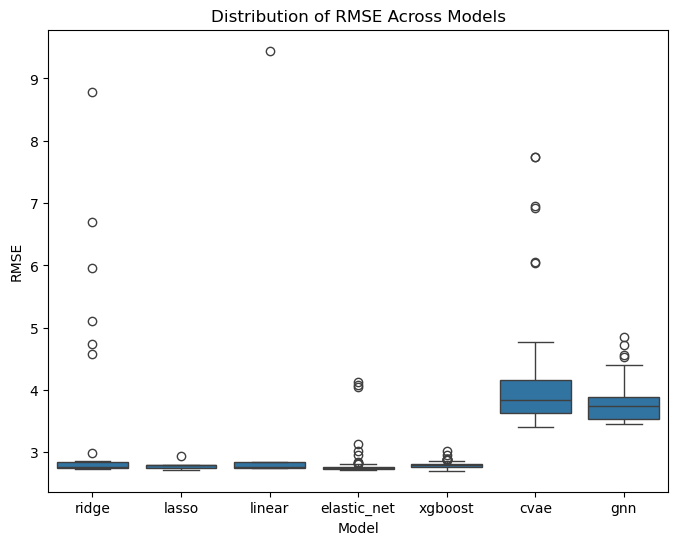

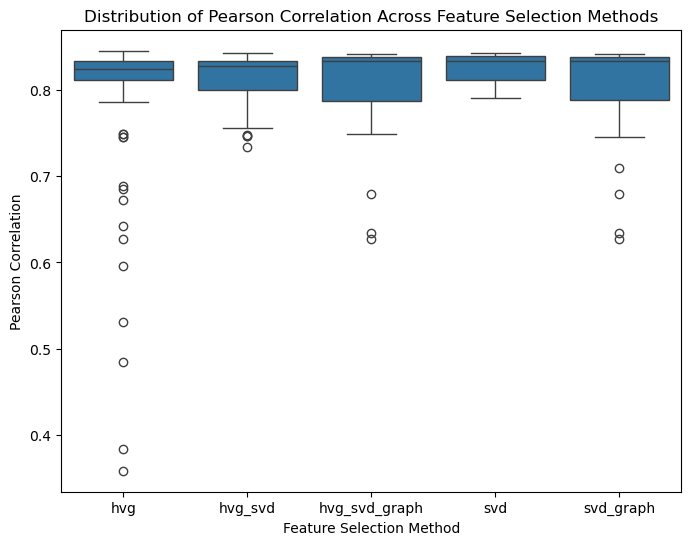

In [51]:
# Box plot for RMSE by model
plt.figure(figsize=(8, 6))
sns.boxplot(x='method_name', y='rmse', data=vita)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Distribution of RMSE Across Models')
plt.show()

# Box plot for Pearson correlation by feature selection method
plt.figure(figsize=(8, 6))
sns.boxplot(x='featsel', y='pearson', data=vita)
plt.xlabel('Feature Selection Method')
plt.ylabel('Pearson Correlation')
plt.title('Distribution of Pearson Correlation Across Feature Selection Methods')
plt.show()


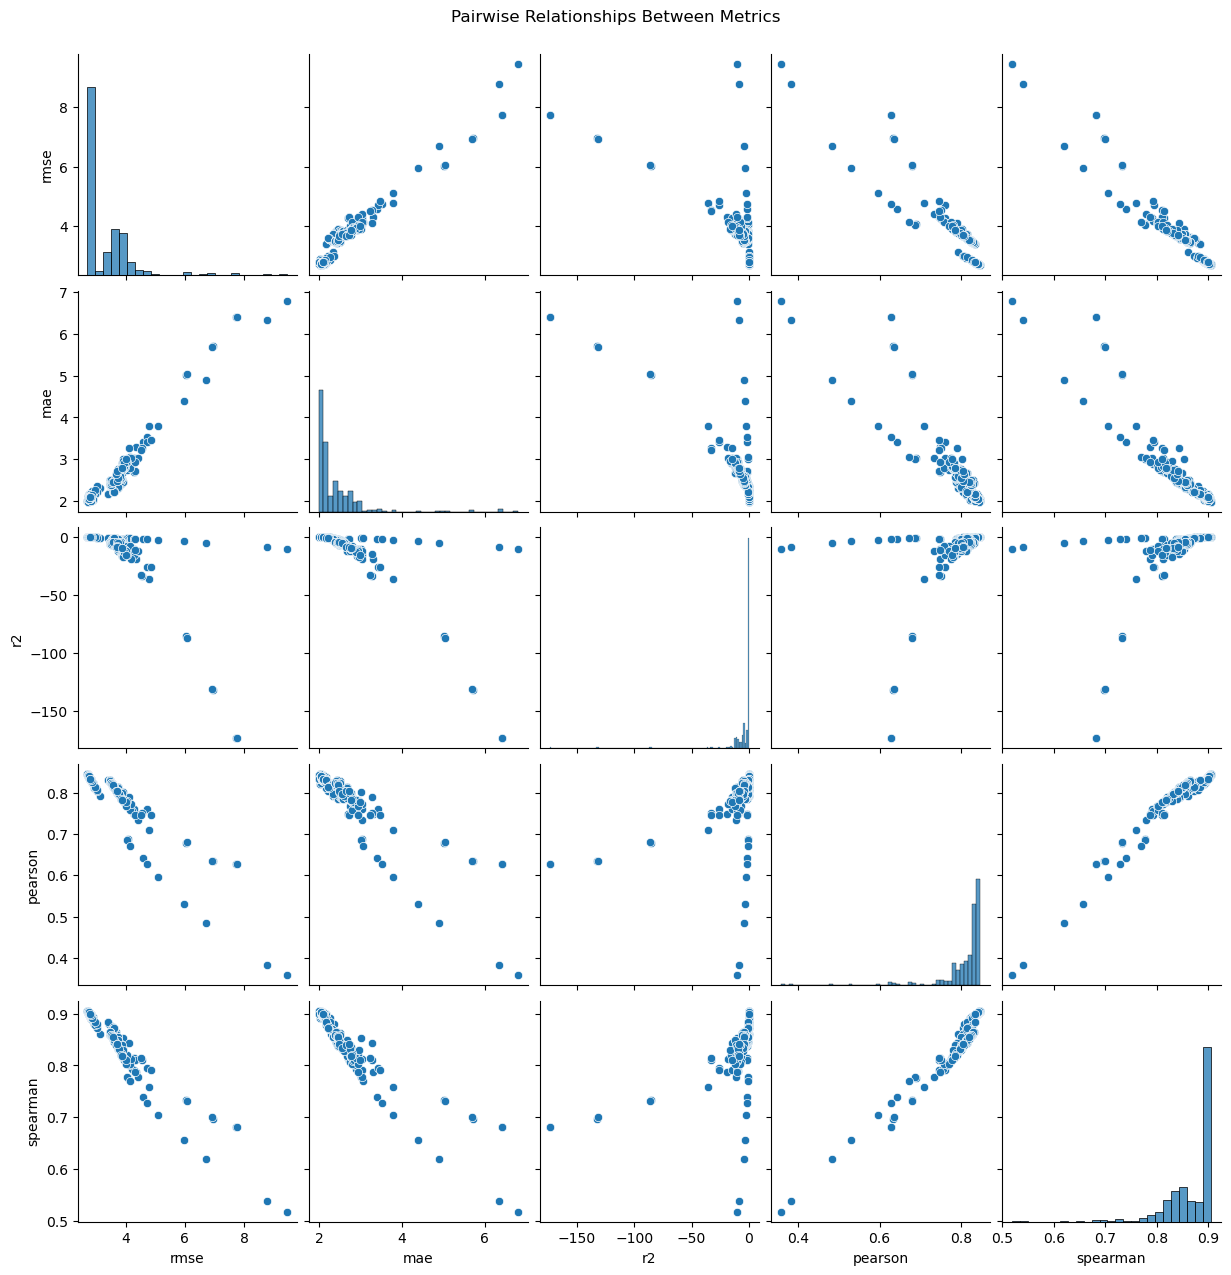

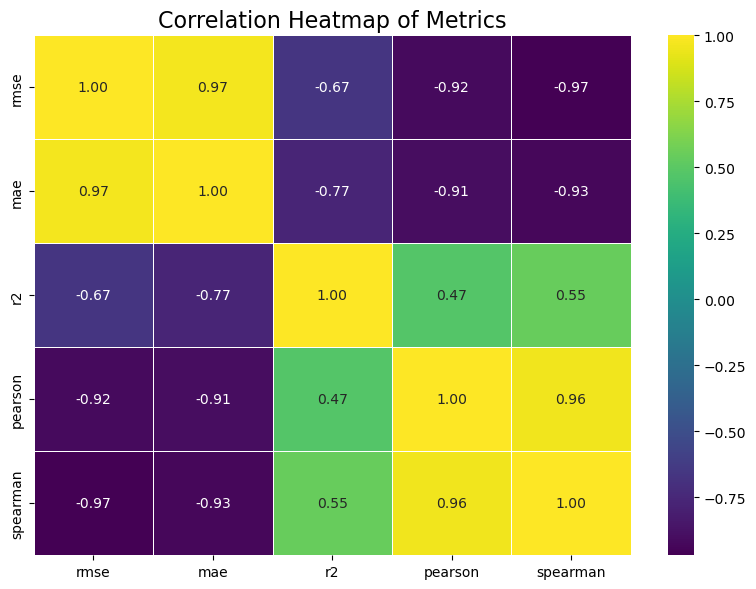

In [54]:
sns.pairplot(vita[['rmse', 'mae', 'r2', 'pearson', 'spearman']])
plt.suptitle('Pairwise Relationships Between Metrics', y=1.02)
plt.show()

metrics = vita[['rmse', 'mae', 'r2', 'pearson', 'spearman']]
# Compute the correlation matrix.
corr_matrix = metrics.corr()
# Set up the matplotlib figure.
plt.figure(figsize=(8, 6))
# Create a heatmap with annotations.
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Metrics', fontsize=16)
plt.tight_layout()
plt.show()


Per model heatmap of metrics correlations

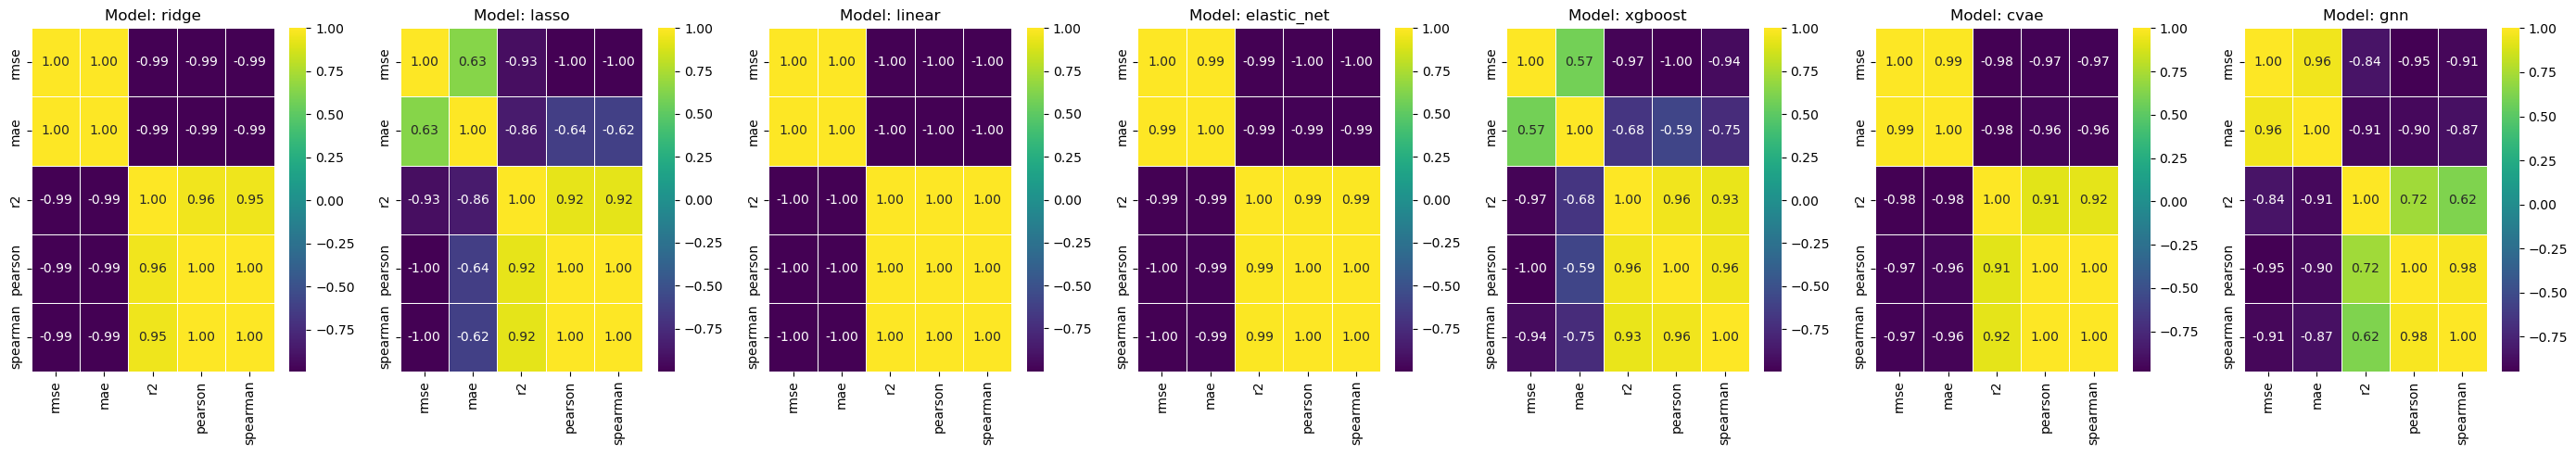

In [56]:
models = vita['method_name'].unique()
n_models = len(models)

# Create a subplot for each model in one row.
fig, axes = plt.subplots(1, n_models, figsize=(n_models * 4, 5), squeeze=False)
axes = axes.flatten()

for i, model in enumerate(models):
    # Subset data for the current model.
    subset = vita[vita['method_name'] == model]
    metrics = subset[['rmse', 'mae', 'r2', 'pearson', 'spearman']]
    
    # Compute the correlation matrix.
    corr_matrix = metrics.corr()
    
    # Create the heatmap in the corresponding subplot.
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'Model: {model}')

plt.tight_layout()
plt.show()


/home/icb/yufan.xia/tools/apps/mamba/envs/pipeline/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/icb/yufan.xia/tools/apps/mamba/envs/pipeline/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


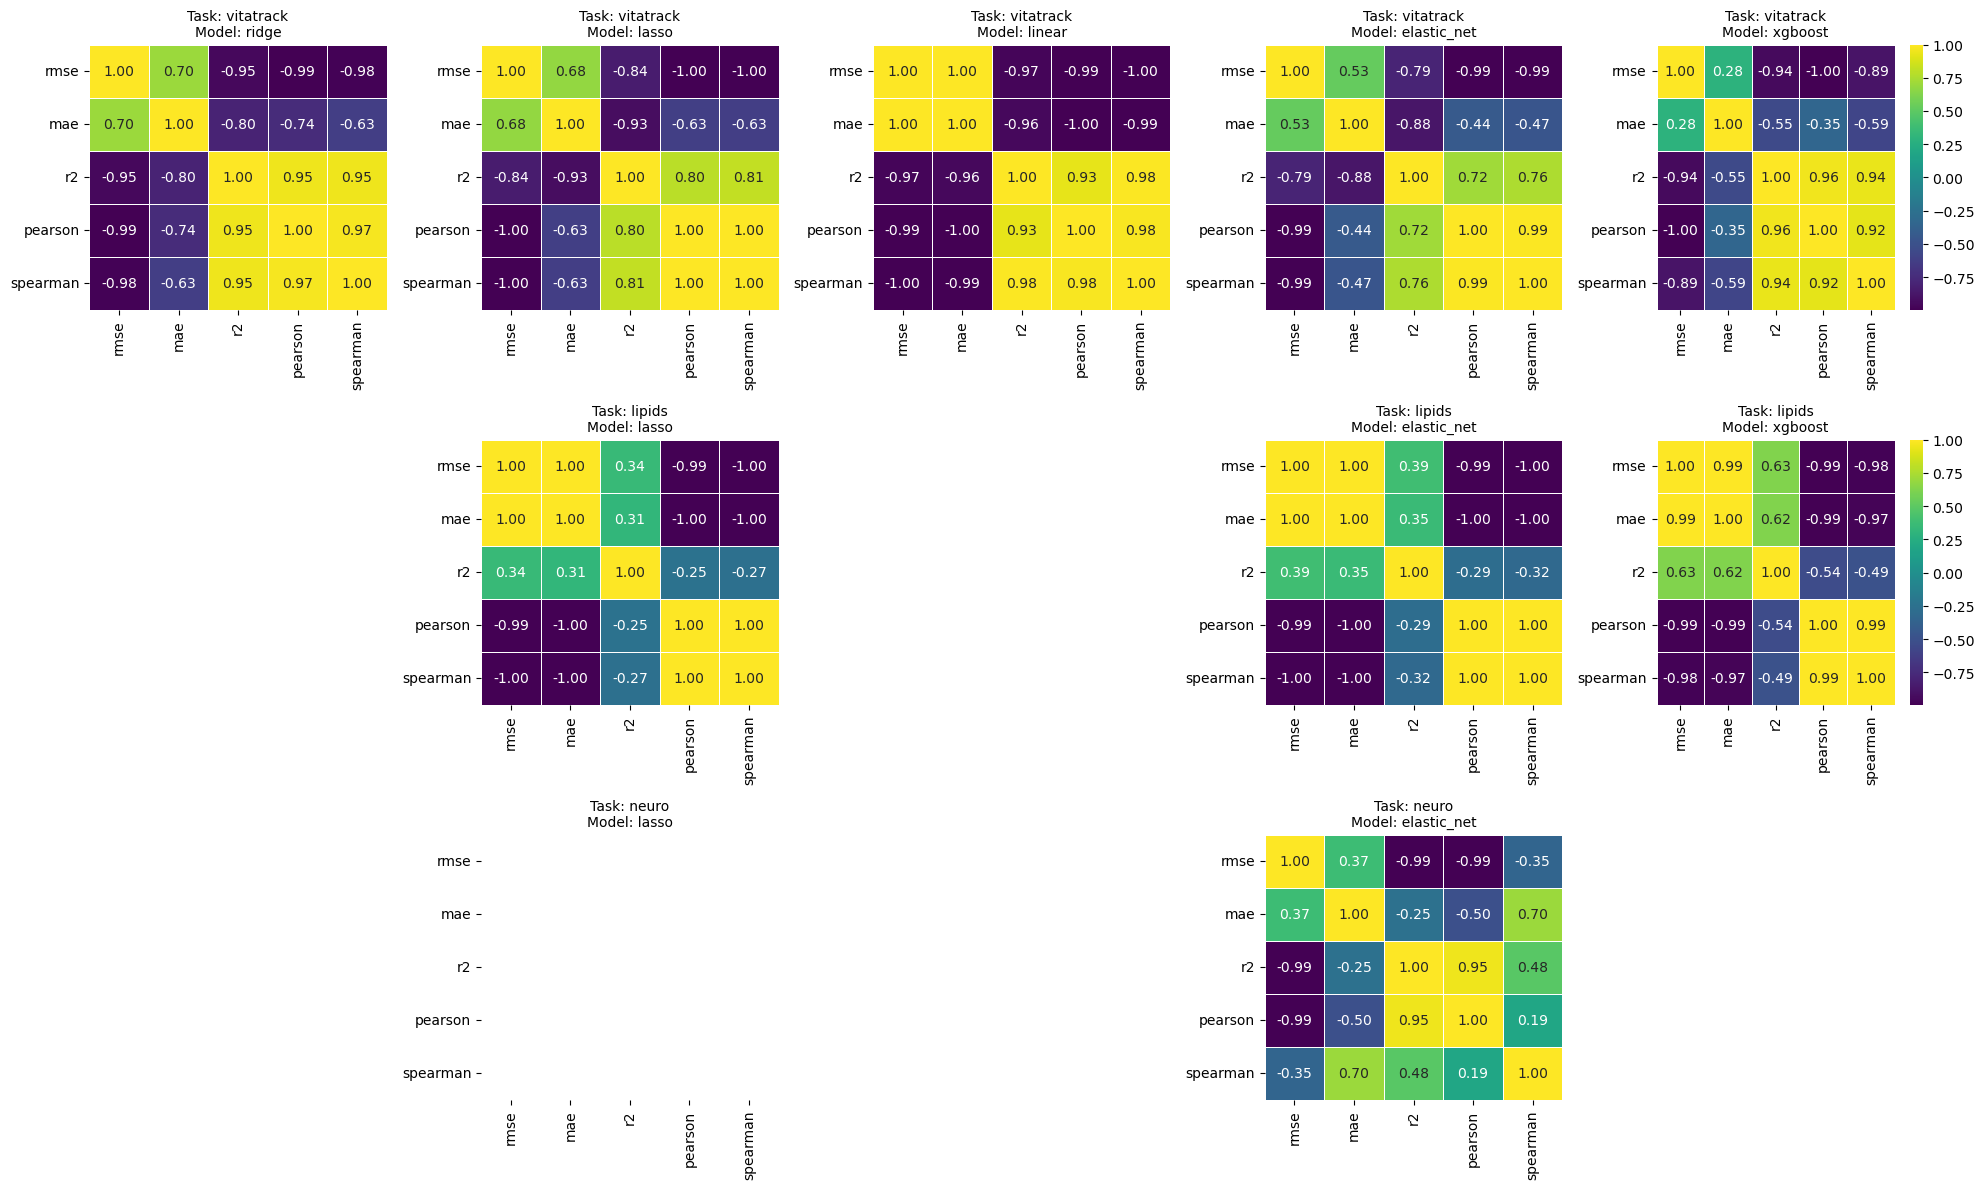

In [ ]:
plot_df = merged_df[merged_df["r2"] > 0]
#only positive R2 models:
plot_df = merged_df[merged_df["r2"] > 0]
# Get unique tasks and models
tasks = plot_df['task'].unique()
models = plot_df['method_name'].unique()

tasks = plot_df['task'].unique()
models = plot_df['method_name'].unique()


n_tasks = len(tasks)
n_models = len(models)

# Create a subplot grid: rows for tasks, columns for models.
fig, axes = plt.subplots(n_tasks, n_models, figsize=(n_models * 4, n_tasks * 4), squeeze=False)

# Loop over each task (vertical axis) and each model (horizontal axis)
for i, task in enumerate(tasks):
    for j, model in enumerate(models):
        # Filter the DataFrame for the current task and model
        subset = plot_df[(plot_df['task'] == task) & (plot_df['method_name'] == model)]
        
        # If there are no data for the current combination, hide the subplot and move on.
        if subset.empty:
            axes[i][j].axis('off')
            continue
        
        # Select only the performance metrics
        metrics = subset[['rmse', 'mae', 'r2', 'pearson', 'spearman']]
        corr_matrix = metrics.corr()

        # Create the heatmap in the specific subplot cell
        sns.heatmap(corr_matrix,
                    annot=True,
                    cmap='viridis',
                    fmt=".2f",
                    linewidths=0.5,
                    cbar=(j == n_models - 1),  # Show colorbar on the last column only
                    ax=axes[i][j])
        axes[i][j].set_title(f"Task: {task}\nModel: {model}", fontsize=10)

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.show()


In [63]:
df.head()

y_true    y_pred
0  1.097236  1.545438
1  0.897441  0.702804
2  2.534548  2.513539
3  2.944198  1.995690
4  2.924279  2.088878

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_best_model_predictions(task, top_k=1):
    base_path = f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/{task}"
    summary_path = os.path.join(base_path, "best_results_per_model_r2.tsv")

    # Load summary table
    summary_df = pd.read_csv(summary_path, sep='\t')
    
    # Sort by R² descending to get best models
    best_models = summary_df.sort_values("r2", ascending=False).head(top_k)

    for i, row in best_models.iterrows():
        model = row["model"]
        feature_selection = row["feature_selection"]
        hash_val = row["hash"]

        # Build the full prediction file path
        pred_path = os.path.join(base_path, model, feature_selection, hash_val, "predictions.tsv")

        # Load predictions
        df = pd.read_csv(pred_path, sep="\t")

        # Create scatterplot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x="y_true", y="y_pred", alpha=0.4)
        min_val = min(df["y_true"].min(), df["y_pred"].min())
        max_val = max(df["y_true"].max(), df["y_pred"].max())
        plt.plot([min_val, max_val], [min_val, max_val], ls="--", color="gray")

        plt.title(f"{model} + {feature_selection} (R²={row['r2']:.3f})")
        plt


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_best_model_predictions(task, top_k=1):
    base_path = f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/{task}"
    summary_path = os.path.join(base_path, "best_results_per_model_r2.tsv")

    # Load summary table
    summary_df = pd.read_csv(summary_path, sep='\t')
    
    # Sort by R² descending to get best models
    best_models = summary_df.sort_values("r2", ascending=False).head(top_k)

    for i, row in best_models.iterrows():
        model = row["method_name"]
        feature_selection = row["featsel"]
        hash_val = row["hash"]

        # Build the full prediction file path
        pred_path = os.path.join(base_path, model, feature_selection, hash_val, "predictions.tsv")

        # Load predictions
        df = pd.read_csv(pred_path, sep="\t")

        # Create scatterplot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x="y_true", y="y_pred", alpha=0.4)
        min_val = min(df["y_true"].min(), df["y_pred"].min())
        max_val = max(df["y_true"].max(), df["y_pred"].max())
        plt.plot([min_val, max_val], [min_val, max_val], ls="--", color="gray")

        plt.title(f"{model} + {feature_selection} (R²={row['r2']:.3f})")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


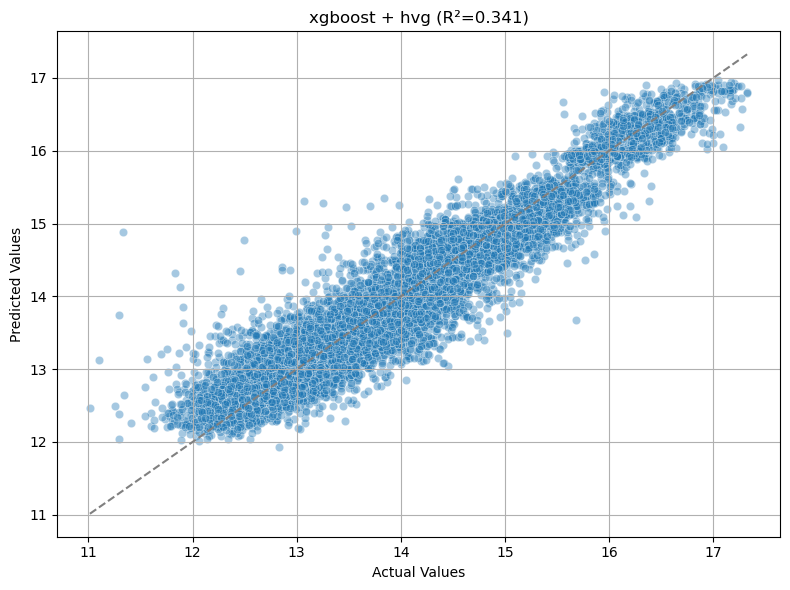

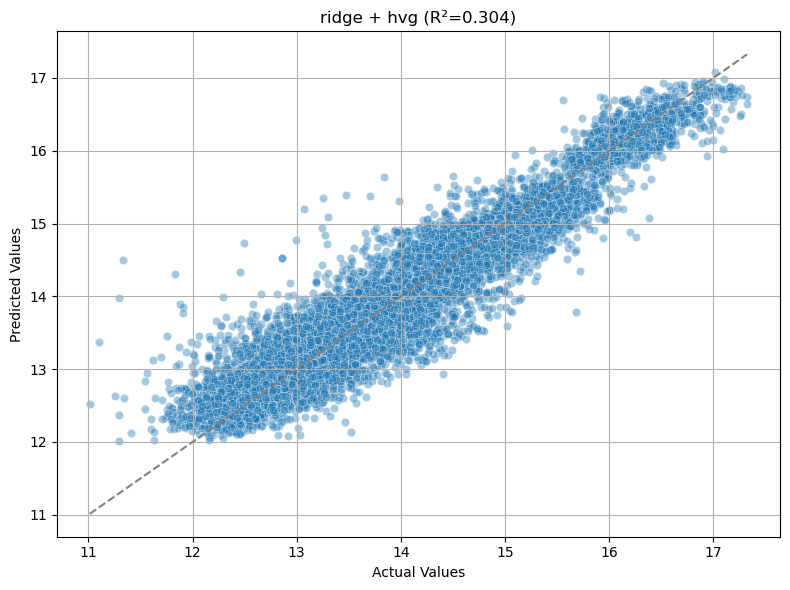

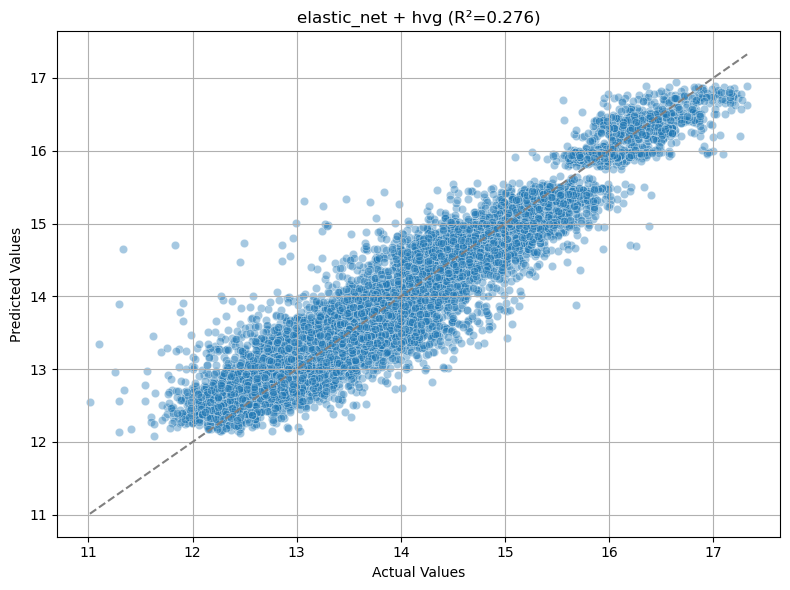

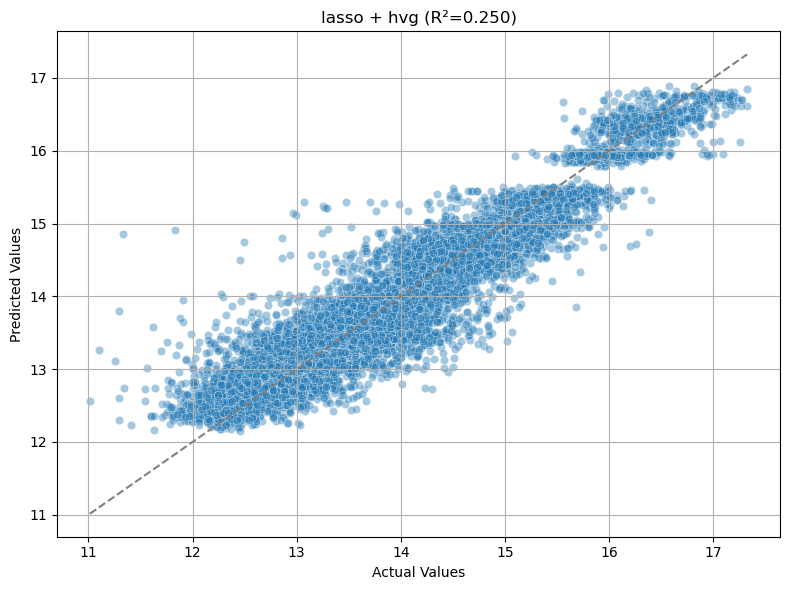

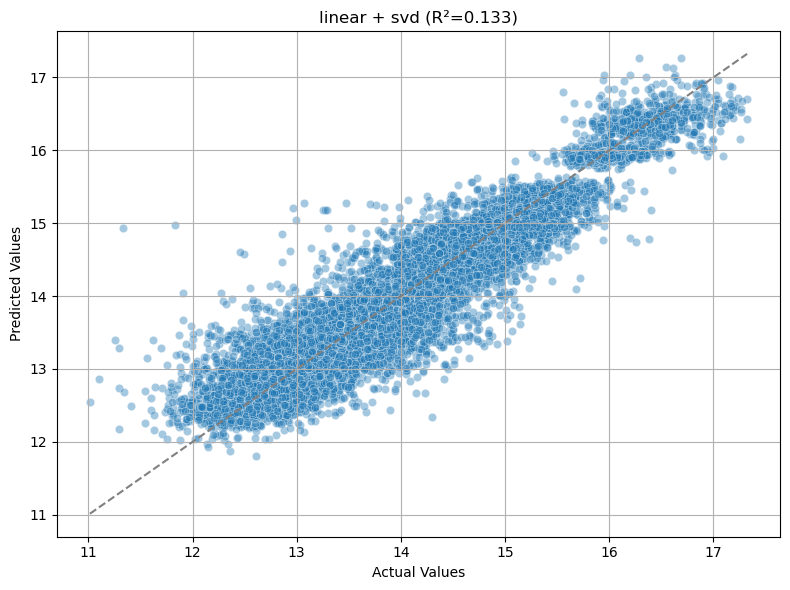

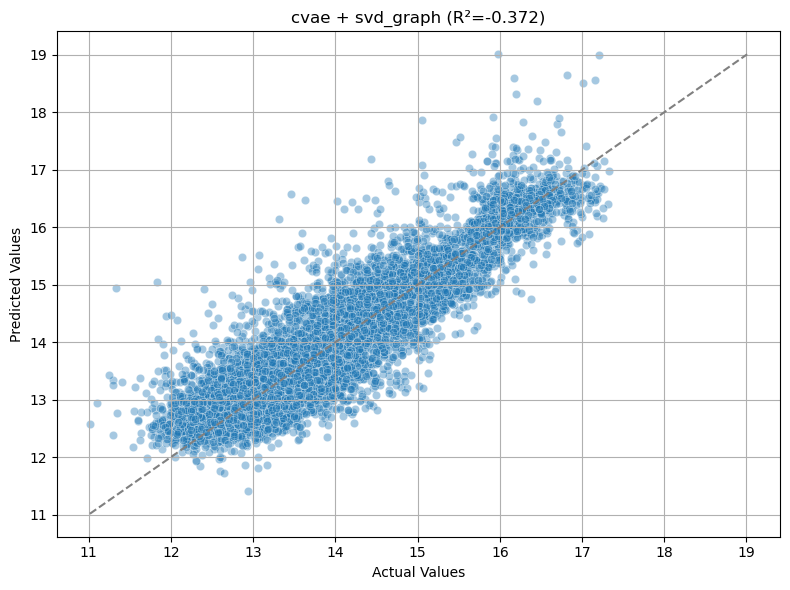

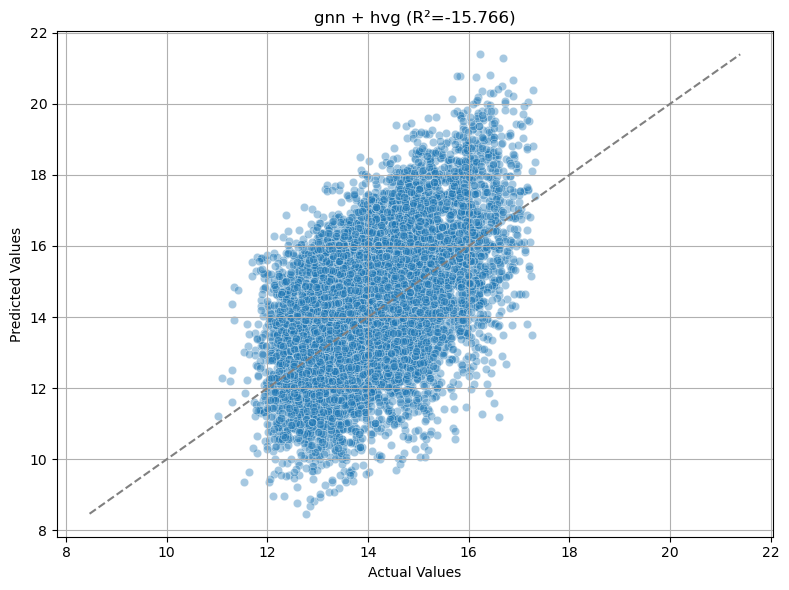

In [15]:
plot_best_model_predictions("V11L12-038_A1_MOSCOT_paired_hvg_top20_spatvar", top_k=7)



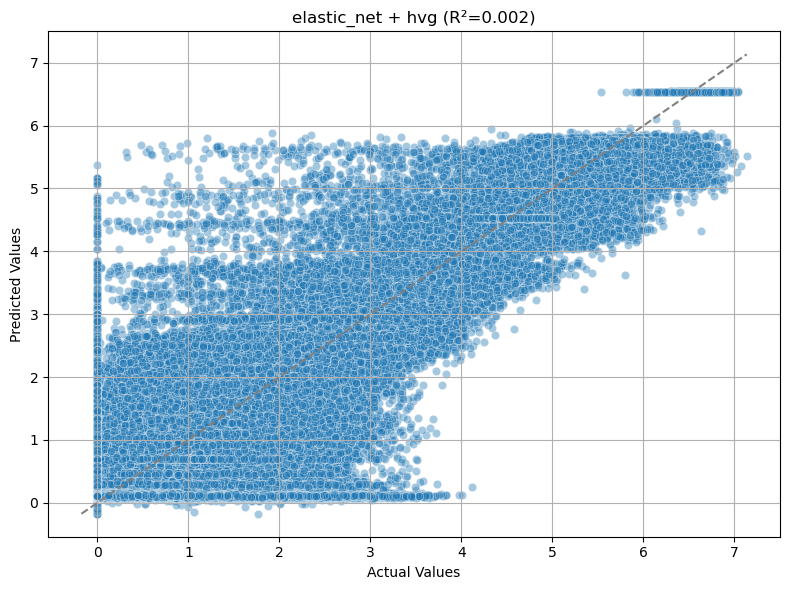

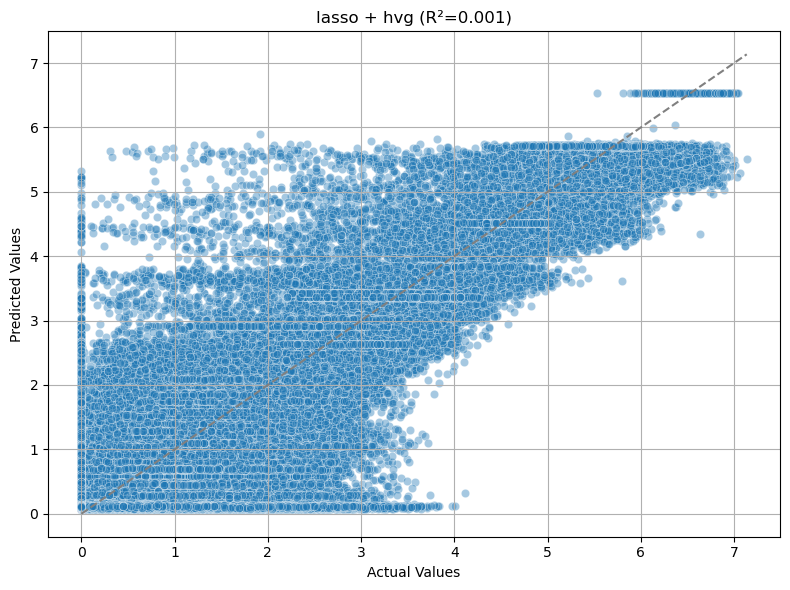

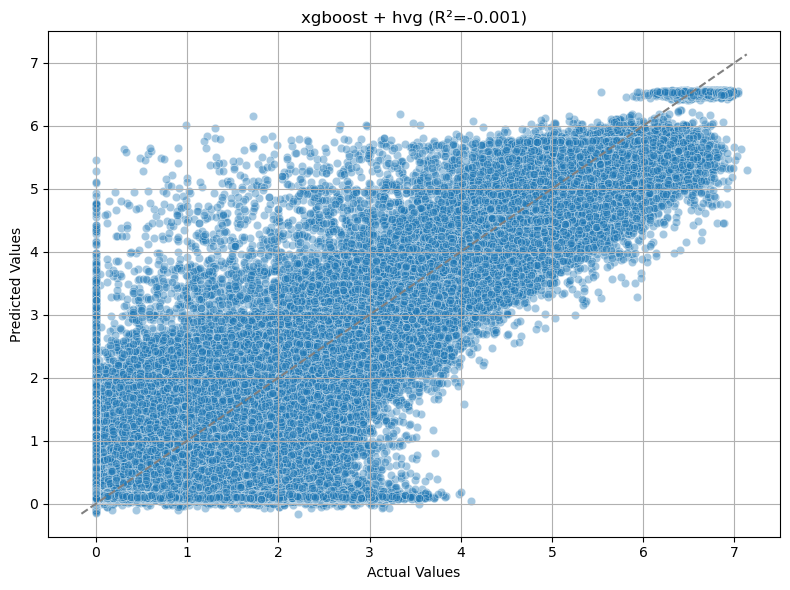

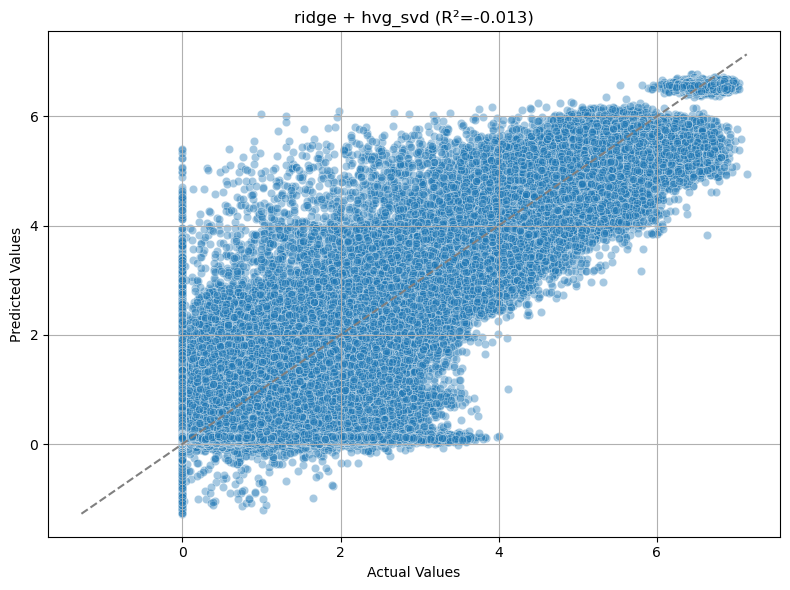

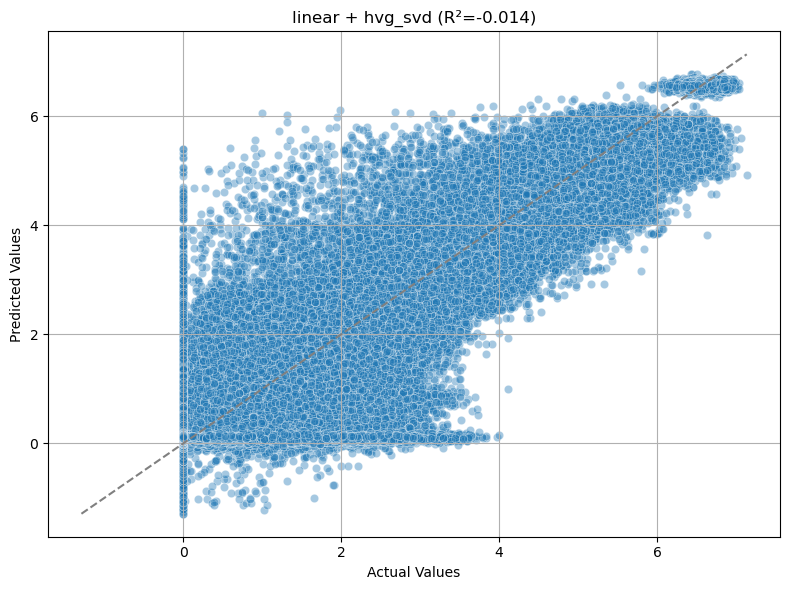

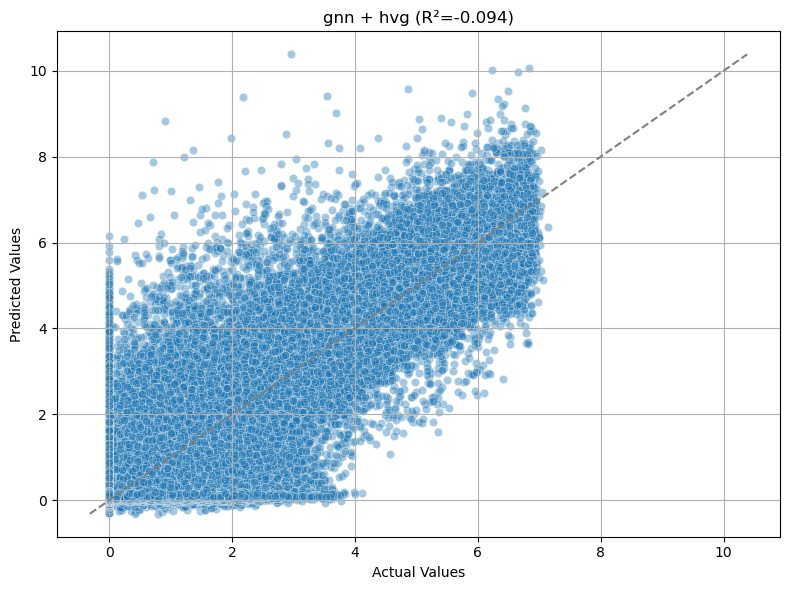

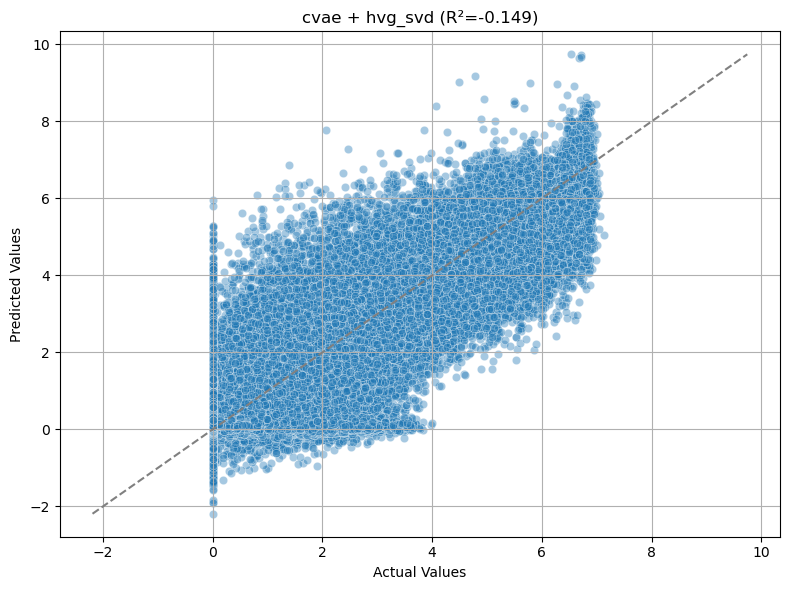

In [18]:
# Example usage:
plot_best_model_predictions("neuro", top_k=7)


     y_true    y_pred
0  1.097236  1.545438
1  0.897441  0.702804
2  2.534548  2.513539
3  2.944198  1.995690
4  2.924279  2.088878


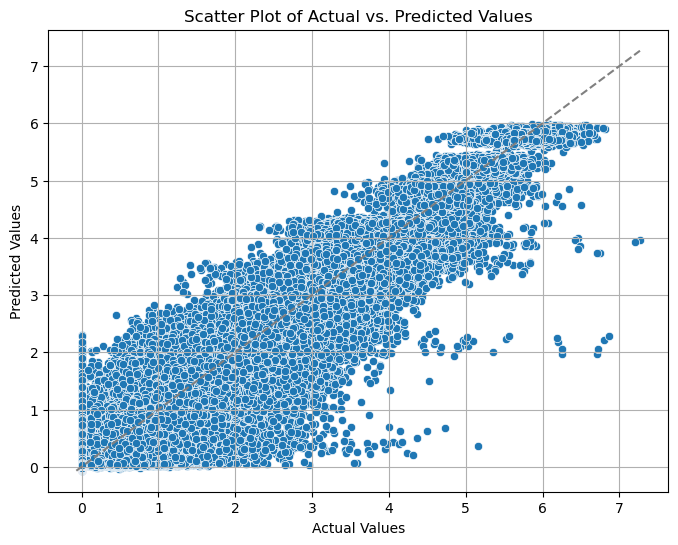

In [ ]:
file_path = '/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/lipids/xgboost/hvg/3b6e7b8e54/predictions.tsv'

# Load the file assuming it's tab-separated; adjust the delimiter if needed.
df = pd.read_csv(file_path, sep='\t')

# # Display the first few rows to verify the content
print(df.head())

# Create a scatterplot comparing actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='y_true', y='y_pred')

# Optionally, plot a diagonal line representing perfect predictions.
# This line helps to visually assess how close predictions are to the actual values.
min_val = min(df['y_true'].min(), df['y_pred'].min())
max_val = max(df['y_true'].max(), df['y_pred'].max())
plt.plot([min_val, max_val], [min_val, max_val], ls="--", color="gray")

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.grid(True)
plt.show()


In [66]:
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: load your merged results DataFrame.
# Adjust the path/file name as needed:
# merged_df = pd.read_csv('merged_results.tsv', sep='\t')

# For demonstration, here's a placeholder for merged_df:
# merged_df = pd.DataFrame(...)

# Define the base directory for predictions
base_dir = '/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/'

# List the metrics we want to consider and how to sort (for r2 we want descending, for rmse/mae ascending)
metrics_info = {
    'r2': {'ascending': False},
    'rmse': {'ascending': True},
    'mae': {'ascending': True}
}

# Get unique tasks from the merged results
tasks = merged_df['task'].unique()

# Loop over tasks
for task in tasks:
    df_task = merged_df[merged_df['task'] == task]
    
    print(f"Processing task: {task}")
    
    # For each metric, get top 5 performers
    for metric, sort_opts in metrics_info.items():
        print(f"  Metric: {metric}")
        
        # Sort by the current metric (assumes the metric columns are numeric).
        df_sorted = df_task.sort_values(by=metric, ascending=sort_opts['ascending'])
        top5 = df_sorted.head(5)
        
        # For each of the top performers:
        for idx, row in top5.iterrows():
            method = row['method_name']
            featsel = row['featsel']
            exp_hash = row['hash']
            metric_value = row[metric]
            
            # Extract method_params: keep only the first two parameters for illustration.
            try:
                params_dict = ast.literal_eval(row['method_params'])
                # Get first 2 key-value pairs
                first_two = list(params_dict.items())[:2]
                params_str = ', '.join([f"{k}: {v}" for k, v in first_two])
            except Exception as e:
                params_str = "N/A"
            
            # Construct predictions file path:
            predictions_path = os.path.join(base_dir, method, featsel, exp_hash, "predictions.tsv")
            
            # Check that the file exists. If not, skip this row.
            if not os.path.exists(predictions_path):
                print(f"    [Warning] Predictions file not found: {predictions_path}")
                continue
            
            # Load the predictions DataFrame
            try:
                pred_df = pd.read_csv(predictions_path, sep='\t')
            except Exception as e:
                print(f"    [Error] Could not read file {predictions_path}: {e}")
                continue
            
            # Ensure columns are present (expecting 'y_true' and 'y_pred')
            if 'y_true' not in pred_df.columns or 'y_pred' not in pred_df.columns:
                print(f"    [Error] Expected columns not found in {predictions_path}")
                continue
            
            # Create a scatterplot
            plt.figure(figsize=(6, 6))
            sns.scatterplot(data=pred_df, x='y_true', y='y_pred')
            plt.xlabel('y_true')
            plt.ylabel('y_pred')
            plt.title(f"Task: {task}\nMetric: {metric}={metric_value:.2f}\nModel: {method}\nFeatsel: {featsel}\nParams: {params_str}")
            
            # Diagonal line for perfect prediction
            min_val = min(pred_df['y_true'].min(), pred_df['y_pred'].min())
            max_val = max(pred_df['y_true'].max(), pred_df['y_pred'].max())
            plt.plot([min_val, max_val], [min_val, max_val], ls="--", color="gray")
            
            plt.grid(True)
            plt.tight_layout()
            
            # Optionally: Save the plot instead of (or in addition to) showing it
            # Create a unique filename:
            plot_filename = f"{task}_{metric}_{method}_{featsel}_{exp_hash}.png"
            plt.savefig(plot_filename, dpi=150)
            plt.close()
            
            print(f"    Saved scatter plot: {plot_filename}")


Processing task: vitatrack
  Metric: r2
    [Warning] Predictions file not found: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/elastic_net/hvg/9f68e65580/predictions.tsv
    [Warning] Predictions file not found: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/xgboost/hvg/fa5adb982c/predictions.tsv
    [Warning] Predictions file not found: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/xgboost/hvg/fa5adb982c/predictions.tsv
    [Warning] Predictions file not found: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/elastic_net/hvg/adeb6051d1/predictions.tsv
    [Warning] Predictions file not found: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/elastic_net/svd/a763988829/predictions.tsv
  Metric: rmse
    [Warning] Predictions file not found: /lustre/groups/ml01/workspace/eirini/pipeline/data/reports/xgboost/hvg/fa5adb982c/predictions.tsv
    [Warning] Predictions file not found: /lustre/groups/ml01/workspace/eirini/pipeline/data/

In [69]:
df = vita

In [70]:
duplicates = df[df.duplicated()]

# This prints out all duplicate rows.
print("Duplicate rows in the DataFrame:")
print(duplicates)

# Count the total number of duplicates.
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Duplicate rows in the DataFrame:
         rmse       mae         r2   pearson  spearman       task method_name  \
153  2.789736  2.020719   0.009277  0.833954  0.898180  vitatrack     xgboost   
154  2.705071  2.003480   0.045565  0.845359  0.905707  vitatrack     xgboost   
155  2.766099  1.997987   0.023045  0.837213  0.901076  vitatrack     xgboost   
156  2.898733  2.013364  -0.078205  0.821408  0.891998  vitatrack     xgboost   
157  2.729749  1.992848   0.042009  0.841874  0.903765  vitatrack     xgboost   
158  2.750909  1.993635   0.032265  0.839215  0.902417  vitatrack     xgboost   
159  2.799050  1.990895   0.004795  0.833229  0.899574  vitatrack     xgboost   
160  2.774378  2.015924   0.016673  0.835974  0.899416  vitatrack     xgboost   
161  2.730225  1.981000   0.038926  0.842095  0.904514  vitatrack     xgboost   
162  2.762117  2.010867   0.023846  0.837557  0.900558  vitatrack     xgboost   
163  2.888347  2.033000  -0.073393  0.823523  0.893797  vitatrack     xgboos

In [71]:
checkit = pd.read_csv("/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/V11L12-038_B1_rand/merged_results.tsv", sep = '\t')

In [72]:
duplicates = checkit[checkit.duplicated()]


In [73]:
duplicates

rmse       mae        r2   pearson  spearman                task  \
153  0.265345  0.208770  0.055514  0.962661  0.883955  V11L12-038_B1_rand   
154  0.260406  0.201226  0.088254  0.964179  0.886865  V11L12-038_B1_rand   
155  0.261890  0.203313  0.079703  0.963683  0.885685  V11L12-038_B1_rand   
156  0.274446  0.205048 -0.033660  0.960546  0.874173  V11L12-038_B1_rand   
157  0.262055  0.203548  0.079348  0.963618  0.885539  V11L12-038_B1_rand   
158  0.259999  0.200210  0.091600  0.964259  0.886925  V11L12-038_B1_rand   
159  0.259088  0.198322  0.095358  0.964574  0.887609  V11L12-038_B1_rand   
160  0.265414  0.208848  0.054711  0.962641  0.883924  V11L12-038_B1_rand   
161  0.258918  0.197825  0.091617  0.964691  0.887612  V11L12-038_B1_rand   
162  0.264668  0.207704  0.061069  0.962834  0.884253  V11L12-038_B1_rand   
163  0.270745  0.203069 -0.010896  0.961653  0.877712  V11L12-038_B1_rand   
164  0.260887  0.201564  0.085041  0.964025  0.886205  V11L12-038_B1_rand   
165  0.259388  0.197551  0.091226  0.964534  0.887268  V11L12-038_B1_rand   
226  0.383691  0.269967 -0.599294  0.933927  0.829229  V11L12-038_B1_rand   
227  0.377249  0.262283 -0.499224  0.935492  0.837708  V11L12-038_B1_rand   
228  0.360800  0.258101 -0.504175  0.940344  0.835700  V11L12-038_B1_rand   
229  0.386034  0.273691 -0.666333  0.932173  0.819578  V11L12-038_B1_rand   
230  0.357765  0.253902 -0.437352  0.941518  0.840743  V11L12-038_B1_rand   
231  0.376460  0.267938 -0.598099  0.937190  0.829586  V11L12-038_B1_rand   
232  0.345229  0.246283 -0.399089  0.945445  0.845371  V11L12-038_B1_rand   
233  0.386430  0.268110 -0.550929  0.931816  0.832456  V11L12-038_B1_rand   
282  0.398702  0.258406 -0.653722  0.937263  0.871071  V11L12-038_B1_rand   
283  0.357619  0.247911 -0.428331  0.942084  0.869427  V11L12-038_B1_rand   
284  0.343530  0.233321 -0.293054  0.948837  0.878875  V11L12-038_B1_rand   
285  0.319319  0.220162 -0.111686  0.953697  0.882117  V11L12-038_B1_rand   
286  0.341518  0.232315 -0.274210  0.948565  0.880748  V11L12-038_B1_rand   
287  0.366229  0.247498 -0.456029  0.938463  0.864444  V11L12-038_B1_rand   
288  0.458854  0.306396 -1.227442  0.910737  0.837406  V11L12-038_B1_rand   
289  0.320317  0.218016 -0.116237  0.953021  0.879661  V11L12-038_B1_rand   
290  0.365633  0.245999 -0.449402  0.939009  0.870209  V11L12-038_B1_rand   
291  0.339043  0.230609 -0.262342  0.947710  0.878374  V11L12-038_B1_rand   
292  0.387755  0.258773 -0.604191  0.931303  0.856166  V11L12-038_B1_rand   
293  0.363077  0.244164 -0.433659  0.939460  0.867681  V11L12-038_B1_rand   
294  0.349621  0.236619 -0.325159  0.944210  0.874313  V11L12-038_B1_rand   
295  0.324970  0.224517 -0.181949  0.953637  0.883158  V11L12-038_B1_rand   
296  0.348630  0.236823 -0.331705  0.945451  0.871970  V11L12-038_B1_rand   
297  0.368935  0.246946 -0.463867  0.937739  0.868265  V11L12-038_B1_rand   

    method_name featsel                                      method_params  \
153     xgboost     hvg  {'alpha': 50, 'lambda': 100, 'max_depth': 3, '...   
154     xgboost     hvg  {'alpha': 10, 'lambda': 50, 'max_depth': 5, 'l...   
155     xgboost     hvg  {'alpha': 30, 'lambda': 80, 'max_depth': 4, 'l...   
156     xgboost     hvg  {'alpha': 0, 'lambda': 10, 'max_depth': 6, 'le...   
157     xgboost     hvg  {'alpha': 30, 'lambda': 85, 'max_depth': 4, 'l...   
158     xgboost     hvg  {'alpha': 20, 'lambda': 60, 'max_depth': 4, 'l...   
159     xgboost     hvg  {'alpha': 15, 'lambda': 40, 'max_depth': 5, 'l...   
160     xgboost     hvg  {'alpha': 50, 'lambda': 90, 'max_depth': 3, 'l...   
161     xgboost     hvg  {'alpha': 5, 'lambda': 30, 'max_depth': 6, 'le...   
162     xgboost     hvg  {'alpha': 45, 'lambda': 95, 'max_depth': 3, 'l...   
163     xgboost     hvg  {'alpha': 0, 'lambda': 0, 'max_depth': 4, 'lea...   
164     xgboost     hvg  {'alpha': 25, 'lambda': 75, 'max_depth': 5, 'l...   
165     xgboost     hvg  {'alpha': 10, 'lambda': 55, 'max_depth': 6,